# Test Technique Synthesio - Mathieu Delcluze

### Ce test a pour but d'implémenter un algorithme permettant de predire si une review est positive ou négative. 

## Exploration, analyse et preprocessing

Dans cette première partie, on va s'intéresser à l'exploration du dataset fourni. Nous allons verifier le type de données que nous avons. Ensuite on va appliquer différente sortes de préprocessing en vue de classifier nos reviews. 

In [3]:
from synthesio_classes import *
data = Data()
data.load_dataset()
print(data.train_set[456])
print('')
print(data.train_set[20390])

The Thief of Baghdad is one of my ten all-time favorite movies. It is exciting without gore, it is beautifully filmed and the art direction is flawless. The casting couldn't have been better. Rex Ingram made me believe in genies. And the epitome of evil is certainly captured by Conrad Veight as Jafar. He set the bar very high.<br /><br />..I watch this movie at least twice a year...and never tire of it. This film is an adventure for all ages..no-one too old to enjoy it. The Thief of Bahgdad jogs my memories to a more innocent time...I was ten years old the first time I saw it and the U.S. was just about to enter WWII. Conrad Vieght was such a great actor that he was able to continue this underlying "evilness" a few years later in "Casablanca." And Korda teamed up,I believe, with Justin and Dupree again in "The Four Feathers"....great film-making!

Bradford Dillman plays a scientist who wakes up one morning in the middle of a bloody crime scene; having partial amnesia (or "global amnesi


On remarque que pour certains textes, il y a encore la présence de balise html. Nous allons preprocess chaque texte afin de supprimer ce type de balise qui ne sert pas vraiment à savoir si un article est positif ou négatif.

De plus chaque texte comporte de nombreux signe de ponctuation qui ne servent pas vraiment à distinguer un article positif ou négatif. Nous allons ainsi supprimer ces différents signes. Ceci est un choix personnel, mais il serait tout à fait possible de garder ces signes de ponctuations dans le cadre d'une tache de sentiment analysis.



## Regex

Nous allons deux types de Regex pour nettoyer nos textes. Le premier concerne les balises html, celui ci se trouve dans la classe Preprocesser avec la methode regex_html().
Le deuxième concerne la ponctuation qui se situe dans la classe Preprocesser avec la methode regex_ponctuation()

In [4]:
preprocess = Preprocesser(data)
preprocess.regex_all()

## Normalisation

Nous allons maintenant appliquer différentes transformation qui vont permettre de garder les mots les plus essentiels à la classification d'un texte en fonction de son sentiment. Tout d'abord nous allons supprimer ce qu'on appelle les stop words. Ces mots sont les mots les plus courants dans le langage anglais. Par leur forte présence dans l'ensemble des textes, ils ne permettent pas vraiment d'aider à distinguer le sentiment d'un texte. De plus leurs présences rajoutent du temps de computation et de mémoire qui n'est pas forcement utile. 

In [5]:
print(english_stop_words)
preprocess.remove_stop_words()
print(preprocess.data.train_set[456])
print('')
print(preprocess.data.clean_train[456])


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Nous pouvons aussi appliquer deux transformations qui consistent à Normaliser le texte. La première est la lemmatization et la second est la stemmatization. 


In [6]:
print(preprocess.data.clean_train[456])
print('')
preprocess.stemmed_text()
preprocess.lemmatized_text()
print(preprocess.data.clean_train[456])

thief baghdad one ten time favorite movies. exciting without gore, beautifully filmed art direction flawless. casting better. rex ingram made believe genies. epitome evil certainly captured conrad veight jafar. set bar high. ..i watch movie least twice year...and never tire it. film adventure ages..no one old enjoy it. thief bahgdad jogs memories innocent time...i ten years old first time saw u.s. enter wwii. conrad vieght great actor able continue underlying "evilness" years later "casablanca." korda teamed up,i believe, justin dupree "the four feathers"....great film making!

thief baghdad one ten time favorit movies. excit without gore, beauti film art direct flawless. cast better. rex ingram made believ genies. epitom evil certainli captur conrad veight jafar. set bar high. ..i watch movi least twice year...and never tire it. film adventur ages..no one old enjoy it. thief bahgdad jog memori innoc time...i ten year old first time saw u.s. enter wwii. conrad vieght great actor abl co

Après avoir normaliser le texte et enlever les stop-words, nous allons maintenant vectoriser les différents textes. 

## Vectorization

Nous allons essayer trois différents types de vectorisation. Les deux premiers sont une vectorisation mot à mot : CountVectorizer et TFIDFVectorizer. Enfin dans un troisième temps nous allons appliquer un ngram pour vectoriser des structures plus longues qu'un seul mot. 

Pour voir l'influence de chacune de ces vectorisations nous allons tracer la ROC curve pour un model de regression logistic avec ces trois différents vectorisation.

In [8]:
from sklearn.linear_model import LogisticRegression



#COUNT VECTORIZATION
X1, X1_test = preprocess.count_vectorization()
data.split_dataset(X1)
model = Model('logistic_regression', data)
model.init_model(LogisticRegression(C=0.05))
model.fit_model()
model.test_accuracy_model()
print('Count Vectorization Accuracy {}'.format(model.test_score)) 
fpr1, tpr1, _ = model.roc_curve()
roc_auc = auc(fpr1, tpr1)

#TFIDF VECTORIZATION
X2, X2_test = preprocess.tfidf_vectorization()
data.split_dataset(X2)
model = Model('logistic_regression', data)
model.init_model(LogisticRegression(C=0.05))
model.fit_model()
model.test_accuracy_model()
print('TFIDF Vectorization Accuracy {}'.format(model.test_score)) 
fpr2, tpr2, _ = model.roc_curve()
roc_auc2 = auc(fpr2, tpr2)

#NGRAM VECTORIZATION
X3, X3_test = preprocess.ngram_vectorization()
data.split_dataset(X3)
model = Model('logistic_regression', data)
model.init_model(LogisticRegression(C=0.05))
model.fit_model()
model.test_accuracy_model()
print('NGRAM Vectorization Accuracy {}'.format(model.test_score)) 
fpr3, tpr3, _ = model.roc_curve()
roc_auc3 = auc(fpr3, tpr3)

/home/mat/Documents/Coding/synthesio/sentiment-analysis-test/synthesio_venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8866
0.8548
0.8864


Nous traçons maintenant les trois courbes ROC associées ainsi que la surface sous cette courbe qui doit être la plus proche de 1.

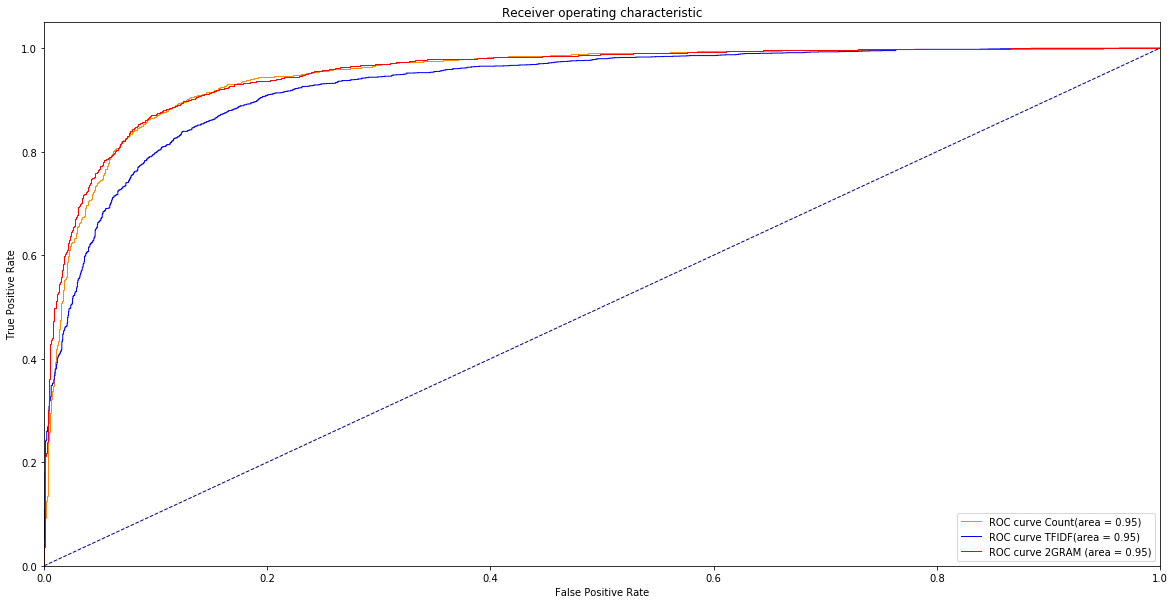

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
roc_auc = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)


plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve Count(area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='blue', lw=1, label='ROC curve TFIDF(area = %0.2f)' % roc_auc)
plt.plot(fpr3, tpr3, color='red', lw=1, label='ROC curve 2GRAM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Pour ce simple modèle de regression logistique nous pouvons voir que la vectorisation par TFIDF présente des résultats légerement inférieur à ceux du Ngram et count vectorizer. 
Pour la suite de ce test, nous allons garder une vectorization avec Ngram avec N=2. 

## Model optimisation

Nous allons maintenant choisir trois modèles différents, regarder leurs différentes courbe ROC associées et ensuite choisir un modèle pour optimiser les performances.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = [LogisticRegression(C=0.05), GradientBoostingClassifier(), RandomForestClassifier()]
titles = ['LogisticRegression', 'Gradient Boostng', 'Random Forest']

X, X_test = preprocess.ngram_vectorization()
data.split_dataset(X)

rocs = []
for title,skmodel in zip(titles,models):
    model = Model(title, data)
    model.init_model(skmodel)
    model.fit_model()
    model.test_accuracy_model()
    fpr, tpr, _ = model.roc_curve()
    rocs.append((fpr, tpr))

/home/mat/Documents/Coding/synthesio/sentiment-analysis-test/synthesio_venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8854
0.8024


/home/mat/Documents/Coding/synthesio/sentiment-analysis-test/synthesio_venv/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7582


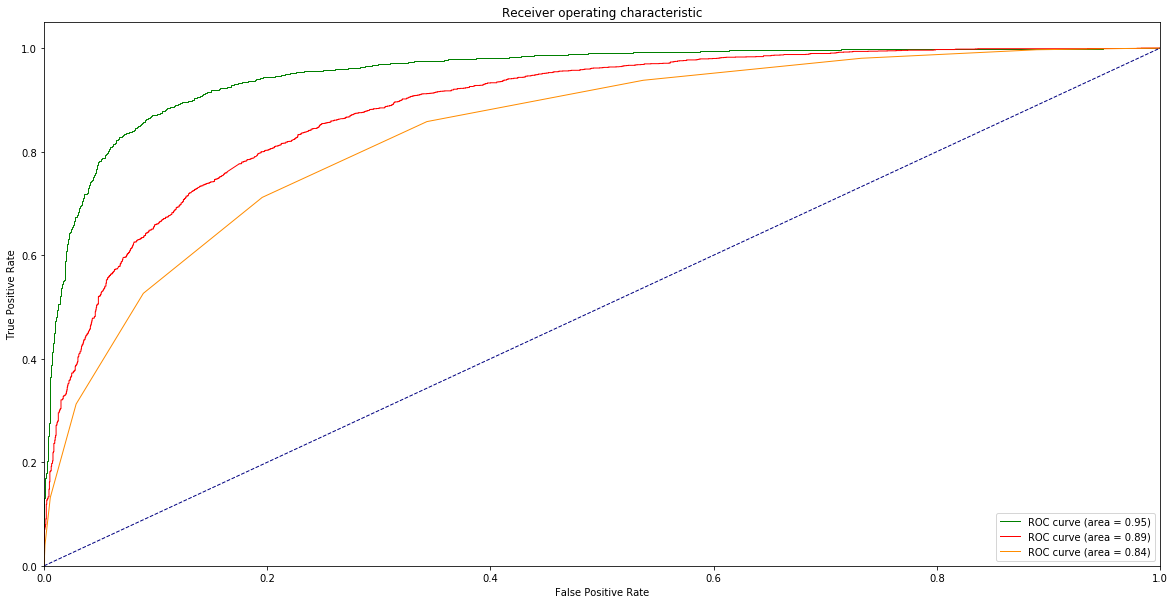

In [20]:
plt.figure(figsize=(20,10))
for r, color in zip(rocs, ['green', 'red', 'darkorange']):
    roc_auc = auc(r[0], r[1])
    plt.plot(r[0], r[1], color=color, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion

Le but de ce test était de classifier des reviews en fonction de leur sentiment. Pour cela nous avions à notre disposition un set de 25000 textes d'entrainement ainsi que 25000 textes pour le test. 

La première étape a été de transformer ce texte en une donnée lisible par un model d'apprentissage. Pour cela nous avons supprimer les stopwords ainsi que de normaliser le texte pour y réduire la redondance des termes. Finalement, nous avons vectoriser le texte pour créer des inputs. On a notament remarqué que la vectorisation avons un role important sur les performances du model. 

Dans une deuxième étape, nous nous sommes interessé à l'optimisation des performances de classification. Pour cela nous avons implementé différents models pour optimiser l'AUC. 

# Piste d'amélioration

En dépit du temps de réalisation du test, nous aurions pu chercher à créer un model plus complexe qui prend un compte l'intégralité de la repartition des mots dans le texte. Par exemple nous aurions pu implementer un model de deep learning comme un Convolutional Neural Network qui prendrai en input l'integralité du texte. Cela aurait eu pour but d'ameliorer la précision du model. Cependant, cela aurait augmenté le temps d'entrainement du model ainsi que la puissance de calcul nécessaire.